<center><a href="https://ibb.co/cJD6pSW"><img src="https://i.ibb.co/y0W6Mcz/cover-depan.jpg" alt="cover-depan" border="0"></a>

# Modul 18 - Regresi Dengan Pipeline dan Cross Validation
Mentor: Mega Bagus Herlambang, PhD

<hr>

Kita akan melanjutkan pembelajaran terkait model regresi, di mana kita ingin memprediksi variabel dependen/target dengan tipe numerik.

Kita akan menggabungkan semua proses *multiple regression* di pembahasan sebelumnya dengan menggunakan Pipeline.

<br>

In [91]:
import streamlit
print('matplotlib: {}'.format(streamlit.__version__))

matplotlib: 1.24.1


### Menggabungkan Semua Dengan Pipeline

In [92]:
# Menyiapkan library
import seaborn as sns
sns.set()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [93]:
# Load dataset
df = pd.read_csv('unburn_carbon3.csv')

# Melihat tampilan dataset
df.head()

,time,unburn_carbon,nilai_kalor,co,co2,out_generator,sfc,eco_gas_out_temp,pa_flow,o2,...,sa_flow,carbon,hydrogen,nitrogen,sulfur,ash,total_moisture,oxygen,surface_moisture,inherent_moisture
0,13-Apr-16,3.6590,4559.685911,0.0254,16.850,609.131028,0.515488,353.347333,928.582025,1.2775,...,1422.268295,49.372898,3.710498,0.588508,0.498562,7.304680,28.997219,9.527635,11.598888,17.398331
1,09-May-16,1.5045,4739.94189,0.0000,13.250,620.713631,0.507914,375.683444,1016.945563,4.0975,...,1408.914527,48.169496,3.481469,0.760060,0.432251,7.895477,27.330060,11.931188,10.932024,16.398036
2,07-Jun-16,2.4490,4832.126248,0.0000,13.275,607.201920,0.512293,353.364613,966.932480,3.3000,...,1363.565909,50.586591,3.739764,0.700430,0.432364,8.154385,26.550000,9.836467,10.620000,15.930000
3,22-Jul-16,0.9680,4599.993082,0.0757,13.275,632.613046,0.543439,356.020724,948.621111,4.3350,...,1471.384697,48.348807,3.309546,0.671983,0.540600,7.817141,28.855547,10.456376,11.542219,17.313328
4,09-Aug-16,3.9520,5067,0.1556,18.500,602.272434,0.516813,357.003215,941.040629,0.6075,...,1480.650494,51.370000,3.730000,0.720000,0.640000,4.670000,26.540000,12.330000,10.616000,15.924000


In [94]:
# kita buang kolom 'User ID'
df.drop('time', axis=1, inplace=True)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   unburn_carbon      82 non-null     float64
 1   nilai_kalor        83 non-null     object 
 2   co                 83 non-null     float64
 3   co2                83 non-null     float64
 4   out_generator      80 non-null     float64
 5   sfc                80 non-null     float64
 6   eco_gas_out_temp   81 non-null     float64
 7   pa_flow            83 non-null     float64
 8   o2                 83 non-null     float64
 9   fuel_temp          83 non-null     float64
 10  sa_flow            83 non-null     float64
 11  carbon             83 non-null     float64
 12  hydrogen           83 non-null     float64
 13  nitrogen           83 non-null     float64
 14  sulfur             83 non-null     float64
 15  ash                83 non-null     float64
 16  total_moisture     83 non-nu

In [96]:
# Melihat hubungan setiap variabel independen (X) dengan variabel dependen (y)
# Proses ini disebut dengan EDA (Exploratory Data Analysis)
#sns.set_palette('colorblind')
#sns.pairplot(df, height=3)
#plt.show()

In [97]:
df = df[(df['unburn_carbon'] < 2)]

In [98]:
df

,unburn_carbon,nilai_kalor,co,co2,out_generator,sfc,eco_gas_out_temp,pa_flow,o2,fuel_temp,sa_flow,carbon,hydrogen,nitrogen,sulfur,ash,total_moisture,oxygen,surface_moisture,inherent_moisture
1,1.5045,4739.94189,0.000000,13.250,620.713631,0.507914,375.683444,1016.945563,4.097500,60.332083,1408.914527,48.169496,3.481469,0.760060,0.432251,7.895477,27.330060,11.931188,10.932024,16.398036
3,0.9680,4599.993082,0.075700,13.275,632.613046,0.543439,356.020724,948.621111,4.335000,60.332083,1471.384697,48.348807,3.309546,0.671983,0.540600,7.817141,28.855547,10.456376,11.542219,17.313328
5,1.6795,4398,0.000150,15.625,NaN,NaN,361.808183,897.331199,3.357500,60.332083,1471.429447,50.770000,3.240000,0.570000,0.140000,2.940000,32.300000,10.040000,12.920000,19.380000
6,0.3195,3375.90205,0.000150,12.700,312.332833,0.647850,360.419045,730.391084,6.730000,60.332083,1179.142903,35.864958,4.043400,0.498686,0.276299,5.950537,32.610000,20.756120,13.044000,19.566000
7,0.1360,3677.49456,0.286900,17.650,487.335794,0.569324,335.432489,873.055673,1.450000,60.332083,1226.166930,39.115592,4.293008,0.615240,0.314456,4.450236,31.640000,19.571468,12.656000,18.984000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,0.0510,4952.03,0.000339,11.450,576.265431,0.615289,364.995813,975.127889,2.220209,66.024762,1559.694208,51.750000,3.180000,0.990000,0.540000,5.320000,30.360000,7.860000,12.144000,18.216000
78,0.1520,4920.257913,0.000181,14.825,469.280000,0.481833,318.770000,911.528175,3.665884,66.024762,1290.524611,49.898146,3.881987,0.824682,0.706863,7.378129,26.180000,11.130193,10.472000,15.708000
79,0.1445,3984.455,0.013110,16.200,574.560000,0.585510,335.770603,1009.479762,2.017841,66.024762,1530.923753,41.620000,3.230000,0.660000,0.360000,7.630000,36.085000,10.415000,14.434000,21.651000
80,0.3310,3813.040009,0.013110,16.200,570.640000,0.634269,352.640860,1088.362946,3.655743,58.855238,1521.551443,40.046135,2.865088,0.632307,0.257607,5.558060,38.190000,12.450802,15.276000,22.914000


In [99]:
# Membagi kolom menjadi kolom numerik dan kategori
var_kategori = [var for var in df.columns if df[var].dtype=='O']
var_numerik = [var for var in df.columns if df[var].dtype!='O' and var!='unburn_carbon']

# Melihat variabel yang sudah dipisah
print(var_kategori)
print(var_numerik)

['nilai_kalor']
['co', 'co2', 'out_generator', 'sfc', 'eco_gas_out_temp', 'pa_flow', 'o2', 'fuel_temp', 'sa_flow', 'carbon', 'hydrogen', 'nitrogen', 'sulfur', 'ash', 'total_moisture', 'oxygen', 'surface_moisture', 'inherent_moisture']


In [100]:
# Mengecek data kosong
df.isnull().mean()

unburn_carbon        0.000000
nilai_kalor          0.000000
co                   0.000000
co2                  0.000000
out_generator        0.027027
sfc                  0.027027
eco_gas_out_temp     0.013514
pa_flow              0.000000
o2                   0.000000
fuel_temp            0.000000
sa_flow              0.000000
carbon               0.000000
hydrogen             0.000000
nitrogen             0.000000
sulfur               0.000000
ash                  0.000000
total_moisture       0.000000
oxygen               0.000000
surface_moisture     0.000000
inherent_moisture    0.000000
dtype: float64

In [101]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['unburn_carbon'], axis=1),
    df['unburn_carbon'],
    test_size = 0.2,
    random_state = 0)

# Melihat dimensi training set dan test set
print((X_train.shape), (X_test.shape))

(59, 19) (15, 19)


In [102]:
y_train

74    1.237000
32    0.490000
56    0.082000
65    0.346000
61    0.262000
9     0.266000
57    0.760000
77    0.051000
7     0.136000
63    0.142000
67    0.150000
5     1.679500
81    0.101000
52    0.398000
14    0.333000
36    0.654000
6     0.319500
68    0.150000
13    0.333000
38    0.664000
70    0.904000
60    0.089000
71    0.515000
39    0.118000
17    0.412000
48    1.065000
22    0.529000
34    0.976000
79    0.144500
42    1.121000
21    0.529000
1     1.504500
80    0.331000
18    0.636000
8     1.049000
19    0.609500
23    0.529000
76    0.026959
11    0.489000
16    0.272000
30    0.499000
44    0.378000
20    0.817500
27    0.211000
54    1.544500
26    0.309000
46    0.499000
45    1.049000
3     0.968000
66    0.195000
15    0.271333
43    0.664000
24    0.529000
12    1.087000
78    0.152000
75    0.839000
72    0.515000
55    1.490000
51    0.187000
Name: unburn_carbon, dtype: float64

In [103]:
# Membuat Pipeline untuk preprocessing
preprocessor_numerik = Pipeline([
    ('imputasi', SimpleImputer(strategy='median')),
    ('scaling', MinMaxScaler())
])

preprocessor_kategori = Pipeline([
    ('imputasi', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoding', OneHotEncoder(drop='first', handle_unknown='ignore'))         
])

# Menggabungkan kedua pipeline di atas
preprocessor = ColumnTransformer([
    ('preprocessing numerik', preprocessor_numerik, var_numerik),
    ('preprocessing kategori', preprocessor_kategori, var_kategori)
])

In [104]:
# Membuat Pipeline untuk modeling
model_reg = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regresi lasso', Lasso(alpha=0.01, max_iter=2000))
])

In [105]:
model_reg

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('preprocessing numerik',
                                                  Pipeline(steps=[('imputasi',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   MinMaxScaler())]),
                                                  ['co', 'co2', 'out_generator',
                                                   'sfc', 'eco_gas_out_temp',
                                                   'pa_flow', 'o2', 'fuel_temp',
                                                   'sa_flow', 'carbon',
                                                   'hydrogen', 'nitrogen',
                                                   'sulfur', 'ash',
                                                   'total_moisture', 'oxygen',
                                                   'surface_moisture',
                                                   'inherent_moisture']),
                                                 ('preprocessing kategori',
                                                  Pipeline(steps=[('imputasi',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoding',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['nilai_kalor'])])),
                ('regresi lasso', Lasso(alpha=0.01, max_iter=2000))])

In [106]:
# Mengeksekusi Pipeline akhir
model_reg.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('preprocessing numerik',
                                                  Pipeline(steps=[('imputasi',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   MinMaxScaler())]),
                                                  ['co', 'co2', 'out_generator',
                                                   'sfc', 'eco_gas_out_temp',
                                                   'pa_flow', 'o2', 'fuel_temp',
                                                   'sa_flow', 'carbon',
                                                   'hydrogen', 'nitrogen',
                                                   'sulfur', 'ash',
                                                   'total_moisture', 'oxygen',
                                                   'surface_moisture',
                                                   'inherent_moisture']),
                                                 ('preprocessing kategori',
                                                  Pipeline(steps=[('imputasi',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoding',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['nilai_kalor'])])),
                ('regresi lasso', Lasso(alpha=0.01, max_iter=2000))])

In [107]:
# Mencoba memprediksi training set
model_reg.predict(X_train)

array([0.71442358, 0.49550028, 0.38946012, 0.40282098, 0.49011328,
       0.51738139, 0.43374904, 0.54895828, 0.51098181, 0.45602615,
       0.49340785, 1.08950015, 0.34460709, 0.51137252, 0.53513189,
       0.52986896, 0.57329439, 0.50698016, 0.5018829 , 0.59460802,
       0.46091674, 0.38163862, 0.42560175, 0.53152705, 0.41299953,
       0.50428823, 0.53253095, 0.62831323, 0.39688739, 0.619017  ,
       0.53384293, 0.9145    , 0.37124616, 0.57879331, 0.68780753,
       0.62347321, 0.53243162, 0.43417094, 0.61063979, 0.48277398,
       0.5545836 , 0.5475511 , 0.51877823, 0.56791275, 0.95450006,
       0.45780382, 0.59048961, 0.6313363 , 0.56908775, 0.4263587 ,
       0.56669242, 0.53239438, 0.51493719, 0.57806832, 0.58413632,
       0.77157709, 0.55819021, 0.89999983, 0.47992603])

Untuk melihat koefisien intercept dan koefisien variabel independen lainnya, kita menggunakan cara yang berbeda untuk Pipeline, di mana kita harus menuliskan nama *step*nya di Pipeline.

In [108]:
# Melihat intercept
print(model_reg['regresi lasso'].intercept_)

# Melihat koefisien
print(model_reg['regresi lasso'].coef_)

0.6415140842974455
[-0.          0.         -0.         -0.         -0.         -0.28317581
  0.         -0.08530436 -0.0393901   0.19996964 -0.          0.
 -0.          0.         -0.         -0.01967439 -0.         -0.
  0.42723944 -0.         -0.         -0.         -0.         -0.
  0.         -0.         -0.         -0.         -0.         -0.
  0.         -0.         -0.         -0.          0.459886    0.
  0.         -0.          0.          0.         -0.         -0.
  0.23230308 -0.         -0.         -0.         -0.         -0.
  0.         -0.         -0.         -0.          0.         -0.
 -0.         -0.         -0.         -0.          0.45330272  0.
  0.         -0.          0.         -0.          0.         -0.
  0.          0.          0.          0.39418063 -0.         -0.
 -0.          0.         -0.        ]


In [109]:
# Melihat nama kolom preprocessing
print(model_reg['preprocessing'].get_feature_names_out())

['preprocessing numerik__co' 'preprocessing numerik__co2'
 'preprocessing numerik__out_generator' 'preprocessing numerik__sfc'
 'preprocessing numerik__eco_gas_out_temp'
 'preprocessing numerik__pa_flow' 'preprocessing numerik__o2'
 'preprocessing numerik__fuel_temp' 'preprocessing numerik__sa_flow'
 'preprocessing numerik__carbon' 'preprocessing numerik__hydrogen'
 'preprocessing numerik__nitrogen' 'preprocessing numerik__sulfur'
 'preprocessing numerik__ash' 'preprocessing numerik__total_moisture'
 'preprocessing numerik__oxygen' 'preprocessing numerik__surface_moisture'
 'preprocessing numerik__inherent_moisture'
 'preprocessing kategori__nilai_kalor_3598.57'
 'preprocessing kategori__nilai_kalor_3677.49456'
 'preprocessing kategori__nilai_kalor_3697.709076'
 'preprocessing kategori__nilai_kalor_3771.795399'
 'preprocessing kategori__nilai_kalor_3813.040009'
 'preprocessing kategori__nilai_kalor_3831.060664'
 'preprocessing kategori__nilai_kalor_3877.577092'
 'preprocessing kategori

In [110]:
# Menulis secara runut model regresi
print('unburn carbon = ',model_reg['regresi lasso'].intercept_,'+',
      model_reg['regresi lasso'].coef_[0],'*',model_reg['preprocessing'].get_feature_names_out()[0],'+',
      model_reg['regresi lasso'].coef_[1],'*',model_reg['preprocessing'].get_feature_names_out()[1],'+',
      model_reg['regresi lasso'].coef_[2],'*',model_reg['preprocessing'].get_feature_names_out()[2],'+',
      model_reg['regresi lasso'].coef_[3],'*',model_reg['preprocessing'].get_feature_names_out()[3],'+',
      model_reg['regresi lasso'].coef_[4],'*',model_reg['preprocessing'].get_feature_names_out()[4])

unburn carbon =  0.6415140842974455 + -0.0 * preprocessing numerik__co + 0.0 * preprocessing numerik__co2 + -0.0 * preprocessing numerik__out_generator + -0.0 * preprocessing numerik__sfc + -0.0 * preprocessing numerik__eco_gas_out_temp


Hasil penulisan dari penggunaan Pipeline agak sedikit berbeda di mana ada tambahan prefiks nama preprocessor-nya sehingga harus disesuaikan kembali.

Dengan formula di atas, maka kita bisa memprediksi Profit sebuah startup cukup hanya dengan mengisikan nilai dari setiap variabel independennya.

Formula di atas adalah model regresi dalam bentuk formula matematis. Model ini dibangun melalui pembelajaran data-data yang ada di training set.

## 4. Evaluasi Model

Sekarang kita akan coba menggunakan formula di atas untuk memprediksi nilai Profit yang ada di training set menggunakan variabel independen di training set, kemudian nanti membandingkan hasilnya dengan y_train.

#### Evaluasi di Training Set

In [111]:
# Memprediksi X_train dan membandingkannya hasilnya dengan y_train
pred_train = model_reg.predict(X_train)

In [112]:
# Hasil prediksi training set
pred_train = pd.DataFrame(pred_train, columns=['unburn_carbon'])
pred_train.head()

,unburn_carbon
0,0.714424
1,0.495500
2,0.389460
3,0.402821
4,0.490113


In [113]:
# Mereset index y_train
y_train = y_train.reset_index(drop=True)
y_train.head()

0    1.237
1    0.490
2    0.082
3    0.346
4    0.262
Name: unburn_carbon, dtype: float64

In [114]:
# Membandingkan 2 numpy array (kita gunakan np.column_stack untuk menggabungkan kedua array ini)
banding_train = pd.DataFrame(np.column_stack((pred_train, pd.DataFrame(y_train), abs(pred_train - pd.DataFrame(y_train)))), columns=['Prediksi', 'Asli', 'Error'])
banding_train.head()

,Prediksi,Asli,Error
0,0.714424,1.237,0.522576
1,0.495500,0.490,0.005500
2,0.389460,0.082,0.307460
3,0.402821,0.346,0.056821
4,0.490113,0.262,0.228113


Kolom error menunjukkan selisih antara nilai prediksi di training set dengan nilai Profit asli di training set.

In [115]:
# Menghitung nilai rata-rata dari error yang sudah dibuat absolut (MAE = Mean absolute error)
banding_train.describe()

,Prediksi,Asli,Error
count,59.000000,59.000000,59.000000
mean,0.552674,0.552674,0.257659
std,0.140707,0.415950,0.181382
min,0.344607,0.026959,0.001000
25%,0.481350,0.236500,0.090444
50%,0.532394,0.490000,0.252387
75%,0.581465,0.788750,0.386947
max,1.089500,1.679500,0.590000


Nilai MAE adalah 6341.26

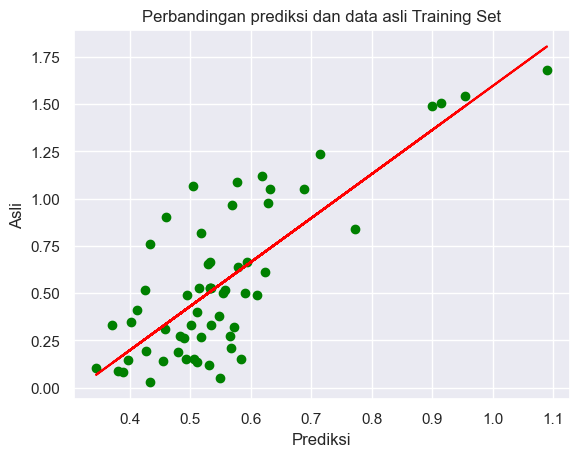

In [116]:
# Membuat plot antara pred_train dengan y_train
plt.scatter(pred_train, y_train, color='green')
m, b = np.polyfit(pred_train.squeeze(), y_train.squeeze(), 1)     # method squeeze adalah merubah Pandas DataFrame menjadi Pandas Series
plt.plot(pred_train, m*pred_train+b, color='red')
plt.title('Perbandingan prediksi dan data asli Training Set')
plt.xlabel('Prediksi')
plt.ylabel('Asli')
plt.show()

#### Menghitung Metrics di Training Set

Plot perbandingan antara prediksi training set (pred_train) dengan y_train memang tampak baik. Tapi kita harus bisa meng-kuantifikasikan baik tidaknya sebuah model. Caranya adalah dengan menghitung nilai error-nya sekaligus menghitung nilai *coefficient of determination* (R2).

In [117]:
# Menghitung nilai error (MAE, MSE, RMSE) di Training Set
from sklearn import metrics
print('MAE = {0:.2f}'.format(metrics.mean_absolute_error(y_train, pred_train)))           # MAE adalah nilai error rata-rata seperti yang ada di tabel banding_train
print('MSE = {0:.2f}'.format(metrics.mean_squared_error(y_train, pred_train)))            # penulisan {0:.2f} adalah untuk menuliskan 2 angka di belakang koma
print('RMSE = {0:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_train, pred_train))))
print('R2 = {0:.2f}'.format(metrics.r2_score(y_train, pred_train)))

MAE = 0.26
MSE = 0.10
RMSE = 0.31
R2 = 0.42


In [118]:
# Cara lain menghitung R2
R2 = model_reg.score(X_train, y_train)
print('Coefficient of Determination (R2) = {0:.2f}'.format(R2))

Coefficient of Determination (R2) = 0.42


Nilai R2 artinya, model regresi kita dapat menjelaskan 95% variasi yang ada, maka bisa dikatakan performa model regresi kita sudah baik.

#### Evaluasi di Test Set

Sekarang kita akan mencoba memprediksi data yang belum pernah dilihat oleh model regresi, yaitu nilai Profit yang ada di test set.

In [119]:
# Memprediksi hasil Test set
pred_test = model_reg.predict(X_test)

c:\Users\Hawlett-Packard\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [120]:
# Hasil prediksi test set
pred_test = pd.DataFrame(pred_test, columns=['unburn_carbon'])
pred_test.head()

,unburn_carbon
0,0.448582
1,0.423244
2,0.522233
3,0.504288
4,0.605915


In [121]:
# Mereset index y_test
y_test = y_test.reset_index(drop=True)
y_test.head()

0    0.124
1    0.262
2    1.055
3    1.065
4    0.490
Name: unburn_carbon, dtype: float64

In [122]:
# Membandingkan 2 numpy array (kita gunakan np.column_stack untuk menggabungkan kedua array ini)
banding_test = pd.DataFrame(np.column_stack((pred_test, pd.DataFrame(y_test), abs(pred_test - pd.DataFrame(y_test)))), columns=['Prediksi', 'Asli', 'Error'])
banding_test

,Prediksi,Asli,Error
0,0.448582,0.1240,0.324582
1,0.423244,0.2620,0.161244
2,0.522233,1.0550,0.532767
3,0.504288,1.0650,0.560712
4,0.605915,0.4900,0.115915
5,0.489142,0.6420,0.152858
6,0.489643,0.7970,0.307357
7,0.532305,0.3050,0.227305
8,0.456997,0.8700,0.413003
9,0.625565,0.2820,0.343565


In [123]:
# Menghitung nilai rata-rata dari error yang sudah dibuat absolut di test set (MAE = Mean absolute error)
banding_test.describe()

,Prediksi,Asli,Error
count,15.000000,15.000000,15.000000
mean,0.521772,0.614633,0.284326
std,0.068791,0.315342,0.162153
min,0.423244,0.124000,0.047964
25%,0.474890,0.362250,0.157051
50%,0.504288,0.581000,0.307357
75%,0.569110,0.854500,0.394594
max,0.634915,1.065000,0.560712


Nilai MAE untuk di test set adalah 7509.57

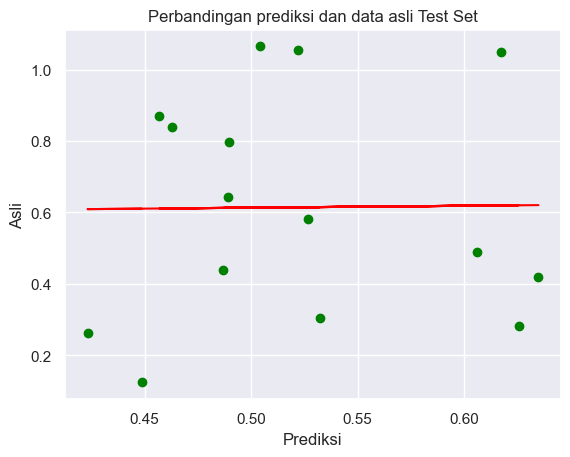

In [124]:
# Membuat plot antara pred_test dengan y_test
plt.scatter(pred_test, y_test, color='green')
m, b = np.polyfit(pred_test.squeeze(), y_test.squeeze(), 1)     # method squeeze adalah merubah Pandas DataFrame menjadi Pandas Series
plt.plot(pred_test, m*pred_test+b, color='red')
plt.title('Perbandingan prediksi dan data asli Test Set')
plt.xlabel('Prediksi')
plt.ylabel('Asli')
plt.show()

Terlihat melalui *scatter plot* di atas bahwa nilai prediksi di test set dengan nilai asli (Profit) di test set hampir sama. Hal ini ditunjukkan dengan titik-titik data di scatter plot (warna hijau) sangat mendekati garis diagonalnya (warna merah).

#### Menghitung metrics di test set

In [125]:
# Menghitung nilai error (MAE, MSE, RMSE) di Test Set
print('MAE = {0:.2f}'.format(metrics.mean_absolute_error(y_test, pred_test)))           # MAE adalah nilai error rata-rata seperti yang ada di tabel banding_train
print('MSE = {0:.2f}'.format(metrics.mean_squared_error(y_test, pred_test)))            # penulisan {0:.2f} adalah untuk menuliskan 2 angka di belakang koma
print('RMSE = {0:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, pred_test))))
print('R2 = {0:.2f}'.format(metrics.r2_score(y_test, pred_test)))

MAE = 0.28
MSE = 0.11
RMSE = 0.32
R2 = -0.14


Bisa kita katakan bahwa performa model di Test Set sangatlah baik (sudah fit).

Hal ini terlihat dari nilai R2 yang cukup tinggi di training set (0.95) dan tidak terlalu jauh dengan nilai R2 saat di test set (0.93). 

Kemudian untuk nilai RMSE di training set (9031) dengan RMSE di test set (9131) tidak terlalu jauh.

Selain itu, secara visual, perbandingan antara nilai prediksi dengan nilai asli juga tidak terlalu jauh.

<br>

### Melakukan Evaluasi Dengan Cross Validation

Proses evaluasi model yang kita lakukan sebelumnya adalah dengan membandingkan performa *training set* dengan *test set*. Dalam *domain machine learning* proses ini disebut dengan ***hold-out method***.

Hal yang perlu dicatat, proses ini berarti hanya 1x evaluasi. 

Ilustrasi dari apa yang sudah kita lakukan adalah sebagai berikut:

<a href="https://ibb.co/pvnxFJt"><img src="https://i.ibb.co/JRCKJ5f/traintest.jpg" alt="traintest" border="0"></a>

Kita menggunakan data *training* dengan proporsi 80%, kita hitung performanya, lalu kemudian kita bandingkan performa model yang sudah belajar dari data-data yang ada di *training set* dengan performa di *test set*.

***Hold-out method*** memiliki kekurangan di mana bisa saja data-data yang ada di *test set* sangat berbeda dengan yang ada di *training set*, sehingga muncul argumen bisa saja performa keduanya berbeda karena memang isi data keduanya juga tidak identik.

Untuk memastikan kinerja model untuk evaluasi lebih dari 1x, kita bisa melakukan proses yang disebut ***cross-validation***.

Implementasi *cross-validation* perlu membagi *training set* membagi 2 lagi, yaitu *training set* dan *validation set*.

<br>

### Memahami *Validation Set*

Terkadang kita ingin membandingkan performa beberapa model, di mana setiap model menggunakan algoritma yang berbeda, atau bisa juga setiap model menggunakan algoritma yang sama tapi dengan setting *hyperparameter* yang berbeda.

Untuk itu kita bagi data menjadi 2 bagian (*training set* dan *test set*), lalu bagi training set tadi menjadi 2 lagi (*training set* dan *validation set*).
Kita gunakan *training set* untuk melatih setiap model dan gunakan *validation set* untuk memilih model terbaik.

Setelah model terbaik didapat, kita *retrain* ulang model tadi menggunakan *training set* awal (gabungan *training+validation*) dan melihat performa model terbaik di *test set*.

Ilustrasinya adalah sebagai berikut:

<a href="https://ibb.co/1spWJJw"><img src="https://i.ibb.co/q04QFFP/traintest2.jpg" alt="traintest2" border="0"></a>

<br>

### *Cross Validation*

Cara lain untuk memilih model terbaik (selain menggunakan *validation set* yang bersifat *fixed*) adalah dengan *cross validation*.<br>
Sebelum melakukan *cross validation*, kita bagi dataset menjadi 2 (*training set* dan *test set*).<br>
Selanjutnya, proses *cross validation* dilakukan di *training set* tadi. 

Melalui *cross validation*, proses *training* dan evaluasi model akan dilakukan berkali-kali menggunakan komposisi *training set* dan *validation set* yang berbeda-beda sebanyak k buah.<br>
Kita bisa melakukan proses *training* dan evaluasi tadi juga sebanyak k kali (sehingga disebut ***k-fold cross validation***).<br>
Jika dibagi menjadi 5 buah, maka disebut *5-fold cross-validation*, yang artinya jumlah iterasinya juga sebanyak 5 buah.

Pembagian *training set* dan *validation set* bisa dilakukan secara *random* atau *stratified*.

Setelah model terbaik dipilih, kita uji model terbaik di *test set*.

Ilustrasi pembagian datasetnya untuk *cross validation* adalah sebagai berikut:

<a href="https://ibb.co/YT9rx69"><img src="https://i.ibb.co/M5TXmbT/traintest3.jpg" alt="traintest3" border="0"></a>

Jika dipilih pembagian training dan validation set secara *stratified*, maka memastikan bahwa setiap *fold*nya, memiliki proporsi distribusi *class* yang sama (ilustrasi di bawah).

<a href="https://ibb.co/w63gsj1"><img src="https://i.ibb.co/mz1T8g7/traintest4.jpg" alt="traintest4" border="0"></a>

Strategi paling umum dipakai adalah 10-fold, paling sedikit adalah 5-fold dan paling banyak 20-fold. Tentu saja sang *data scientist* bebas memilih angka ini.

Untuk melakukan evaluasi model, kita menghitung nilai *error* setiap *validation set* di setiap iterasi (setiap *round*), kemudian kita ambil nilai rata-rata *error* nya. 

Ilustrasinya dapat dilihat pada gambar berikut:

<a href="https://ibb.co/yY7v7Ks"><img src="https://i.ibb.co/cCVfVRT/traintest5.jpg" alt="traintest5" border="0"></a>

<hr>
<br>

### *Cross Validation* di Python

Kita akan menggunakan beberapa model regresi sekaligus.<br> 
Kemudian model terbaik dipilih menggunakan 10-fold *cross validation*.

In [126]:
# Mengimpor library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [127]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['unburn_carbon'], axis=1),
    df['unburn_carbon'],
    test_size = 0.2,
    random_state = 0)

# Melihat dimensi training set dan test set
print((X_train.shape), (X_test.shape))

(59, 19) (15, 19)


In [128]:
# Reset index y_train dan y_test
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [129]:
# Membuat Pipeline untuk preprocessing
preprocessor_numerik = Pipeline([
    ('imputasi', SimpleImputer(strategy='median')),
    ('scaling', MinMaxScaler())
])

preprocessor_kategori = Pipeline([
    ('imputasi', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoding', OneHotEncoder(drop='first', handle_unknown='ignore'))         
])

# Menggabungkan kedua pipeline di atas
preprocessor = ColumnTransformer([
    ('preprocessing numerik', preprocessor_numerik, var_numerik),
    ('preprocessing kategori', preprocessor_kategori, var_kategori)
])

Sekarang kita akan mendefinisikan beberapa model kemudian diikuti dengan *hyperparameter tuning*.

#### 1. Linear Regression

In [130]:
# Model regresi Linear
linreg = LinearRegression()

# Pipeline model regresi linear
pipe_linreg = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('linear', linreg)
])

# Hyperparameter tuning Linear Regression
param_linreg = {}

<br>

#### 2. Lasso Regression

In [131]:
# Model regresi Lasso
lasso = Lasso(alpha=0.001, random_state=0)

# Pipeline model regresi lasso
pipe_lasso = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('lasso', lasso)
])

# Hyperparameter tuning regresi Lasso
param_lasso = {'lasso__alpha': np.arange(0.00, 1.0, 0.01)}

<br>

#### 3. Elastic Net

In [132]:
# Model regresi ElasticNet
enet = ElasticNet(random_state=0)

# Pipeline model regresi Elastic Net
pipe_enet = Pipeline([
    ('preprocessing', preprocessor),
    ('enet', enet)
])

# Hyperparameter tuning Elastic Net
param_enet = {
    'enet__alpha': [0.01, 0.1, 0.5],
    'enet__l1_ratio': [0.01, 0.1, 0.5, 0.9, 1]
}

<br>

#### 4. Decision Tree Regressor

In [133]:
# Model regresi Decision Tree
dt = DecisionTreeRegressor(random_state=0)

# Pipeline model regresi Decision Tree
pipe_dt = Pipeline([
    ('preprocessing', preprocessor),
    ('dt', dt)
])

# Hyperparameter tuning regresi Decision Tree
param_dt = {
    'dt__splitter': ('best','random'),
    'dt__max_depth': np.arange(1,10), 
    'dt__min_samples_split': np.arange(2,10),
    'dt__min_samples_leaf': np.arange(1,5)
}

<br>

#### 5. Random Forest Regressor

In [134]:
# Model regresi Decision Tree
rf = RandomForestRegressor(random_state=0)

# Pipeline model regresi Decision Tree
pipe_rf = Pipeline([
    ('preprocessing', preprocessor),
    ('rf', rf)
])

# Hyperparameter tuning regresi Decision Tree
param_rf = {
    'rf__criterion': ('squared_error', 'absolute_error', 'friedman_mse', 'poisson'), 
    'rf__min_samples_split': np.arange(2,10),
    'rf__min_samples_leaf': np.arange(1,5)
}

<br>

#### 6. Gradient Boosting

In [135]:
# Model regresi Gradient Boosting
gboost = GradientBoostingRegressor(loss='huber',criterion='squared_error',random_state=0)

# Pipeline model regresi Gradient Boosting
pipe_gboost = Pipeline([
    ('preprocessing', preprocessor),
    ('gboost', gboost)
])

# Hyperparameter tuning Gradient Boosting
param_gboost = {
    'gboost__n_estimators':[200, 250, 350, 400], #default 100
    'gboost__learning_rate':[0.75, 0.1, 1.25], #default 0.1
    'gboost__max_depth':[2], #default 3
    'gboost__min_samples_split':[5, 6, 7, 8], #default 2
    'gboost__min_samples_leaf':[1, 2, 3] # default 1
}

<br>

#### 7. XGBoost

In [136]:
# Model regresi XGBoost
xgb = XGBRegressor()

# Pipeline model regresi XGBoost
pipe_xgb = Pipeline([
    ('preprocessing', preprocessor),
    ('xgb',xgb)
])

# Hyperparameter tuning regresi XGBoost
param_xgb = {
    'xgb__learning_rate':[0.01, 0.05, 0.1],
    'xgb__n_estimators':[200, 300, 400]
}

<br>

#### 8. LightGBM Regressor

In [137]:
# Model regresi LightGBM
lgb = LGBMRegressor(random_state=0)

# Pipeline model regresi LightGBM
pipe_lgb = Pipeline([
    ('preprocessing', preprocessor),
    ('lgb', lgb)   
])

# Hyperparameter tuning regresi LightGBM
param_lgb = {
    'lgb__learning_rate':[0.01, 0.05, 0.1, 0.2],
    'lgb__n_estimators':[200, 300, 400]
}

Sekarang kita akan mentraining semua model di atas dan mengevaluasinya langsung menggunakan *3-fold cross validation*.

Perlu diperhatikan bahwa kita belum mengimplementasikan *hyperparameter tuning*.

Dokumentasi tipe *scoring* yang bisa dipakai di *cross validation* dapat dilihat melalui link berikut:<br>
https://scikit-learn.org/stable/modules/model_evaluation.html

In [138]:
# Model training dengan cross validation
daftar_model = [pipe_linreg, pipe_lasso, pipe_enet, pipe_dt, pipe_rf, pipe_gboost, pipe_xgb, pipe_lgb]
daftar_nama_model = ['linreg', 'lasso', 'elastic', 'dt', 'rf', 'gboost', 'xgb', 'lgb']
mean_mae = []
mean_r2 = []
std_mae = []
std_r2 = []
test_score_mae = []
test_score_r2 = []

# Setting parameter jika permasalahannya adalah klasifikasi
# skf = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
# tentukan cv = skf jika ingin stratified cross validation

# Looping untuk setiap model yang sudah disiapkan 
for i in daftar_model:
    
    # Melakukan cross validation dan menggunakan kriteria berdasarkan skor MAE dan R2
    cv_mae = -cross_val_score(i, X_train, y_train, cv=3, scoring='neg_mean_absolute_error', verbose=1, n_jobs=-1)  # kita kalikan dengan -1 karena scoring menggunakan nilai negatif
    cv_r2 = cross_val_score(i, X_train, y_train, cv=3, scoring='r2', verbose=1, n_jobs=-1) # n_jobs=-1 artinya kita gunakan semua prerocessor
    
    # Menghitung nilai rata-rata MAE dan R2 dan menambahkannya ke variabel mean_mae dan mean_r2
    mean_mae.append(round(cv_mae.mean(),2))   # round(nilai,2) untuk membulatkan nilai 2 angka di belakang koma
    mean_r2.append(round(cv_r2.mean(),2))
    
    # Menghitung nilai standar deviasi MAE dan R2 dan menambahkannya ke variabel std_mae dan std_r2
    std_mae.append(round(cv_mae.std(),2))
    std_r2.append(round(cv_r2.std(),2))
    
    # Melakukan fitting training set kemudian melakukan prediksi  di test set
    i.fit(X_train, y_train)
    i_predict = i.predict(X_test)
    
    # Menghitung nilai rata-rata MAE dan R2 di test set dan menambahkannya ke variabel test_score_mae dan test_core_r2
    test_score_mae.append(round(mean_absolute_error(y_test, i_predict),2))
    test_score_r2.append(round(r2_score(y_test, i_predict),2))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.4s finished
c:\Users\Hawlett-Packard\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
c:\Users\Hawlett-Packard\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown

[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.2s finished
c:\Users\Hawlett-Packard\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [139]:
# Membuat DataFrame
cv_mae = pd.DataFrame({'model':daftar_nama_model, 'Train_Mean':mean_mae, 'std':std_mae, 'Test_Score':test_score_mae})
cv_r2 = pd.DataFrame({'model':daftar_nama_model, 'Train_Mean':mean_r2, 'std':std_r2, 'Test_Score':test_score_r2})

In [140]:
# Melihat hasil cross validation berdasarkan MAE
cv_mae

,model,Train_Mean,std,Test_Score
0,linreg,0.44,0.08,0.30
1,lasso,0.36,0.02,0.27
2,elastic,0.34,0.03,0.27
3,dt,0.54,0.01,0.44
4,rf,0.37,0.03,0.27
5,gboost,0.37,0.02,0.32
6,xgb,0.49,0.08,0.26
7,lgb,0.35,0.03,0.26


In [141]:
# Mengurutkan skor dari kecil ke besar
cv_mae_urut = cv_mae.sort_values(by=['Train_Mean','Test_Score'],  ignore_index=True)
cv_mae_urut

,model,Train_Mean,std,Test_Score
0,elastic,0.34,0.03,0.27
1,lgb,0.35,0.03,0.26
2,lasso,0.36,0.02,0.27
3,rf,0.37,0.03,0.27
4,gboost,0.37,0.02,0.32
5,linreg,0.44,0.08,0.30
6,xgb,0.49,0.08,0.26
7,dt,0.54,0.01,0.44


In [142]:
# Melihat hasil cross validation berdasarkan R2
cv_r2

,model,Train_Mean,std,Test_Score
0,linreg,-1.00,0.71,-0.58
1,lasso,-0.37,0.08,-0.12
2,elastic,-0.12,0.08,-0.04
3,dt,-1.88,0.27,-2.61
4,rf,-0.36,0.21,-0.03
5,gboost,-0.35,0.21,-0.53
6,xgb,-1.46,0.64,-0.07
7,lgb,-0.15,0.09,0.06


In [143]:
# Mengurutkan skor dari besar ke kecil
cv_r2_urut = cv_r2.sort_values(by=['Train_Mean','Test_Score'], ascending=False, ignore_index=True)
cv_r2_urut

,model,Train_Mean,std,Test_Score
0,elastic,-0.12,0.08,-0.04
1,lgb,-0.15,0.09,0.06
2,gboost,-0.35,0.21,-0.53
3,rf,-0.36,0.21,-0.03
4,lasso,-0.37,0.08,-0.12
5,linreg,-1.00,0.71,-0.58
6,xgb,-1.46,0.64,-0.07
7,dt,-1.88,0.27,-2.61


Bisa dilihat pada skor di atas bahwa model terbaik (skor MAE terendah dan R2 tertinggi) adalah menggunakan regresi linear (linreg).

Selain itu kita bisa lihat juga performa di *test set* lebih baik daripada di *training set*, artinya modelnya sudah fit.

<hr>
<br>

### Hyperparameter Tuning

Sebenarnya kita sudah cukup puas dengan model regresi linear di atas.

Namun performa di atas bisa ditingkatkan lagi dengan memilih parameter terbaik di setiap modelnya.

Parameter yang diotak-atik (*tuning*) di setiap model ini kita tentukan sebelum model-model tersbeut di*training*.
Selama proses *training*, nilai parameter ini tidak akan berubah.

Nilai parameter yang kita *setting* di awal ini disebut dengan ***hyperparameter***.

Untuk melakukan *hyperparameter tuning* kita gunakan modul <code>GridSearchCV()</code>.<br>
**GridSearchCV()** akan mencoba semua kombinasi parameter yang sudah kita sediakan. Semakin banyak parameter dan semakin besar nilai k untuk CV maka semakin lama prosesnya.

<code>GridSearchCV()</code> akan mengevaluasi semua settingan dari *hyperparameter* yang sudah disiapkan dan mempertahankan *setting*-an terbaik sampai selesai (setelah mencoba semua kombinasi *hyperparameter* dan semua *fold* di *cross validation*).

Dokumentasi dari <code>GridSearchCV()</code> bisa dilihat melalui link berikut:<br>
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

Dalam melakukan *hyperparameter tuning*, jumlah *fold* yang kita gunakan kali ini adalah 5.

In [144]:
# Model training dengan GridSearchCV
daftar_model = [pipe_linreg, pipe_lasso, pipe_enet, pipe_dt, pipe_rf, pipe_gboost, pipe_xgb, pipe_lgb]
daftar_nama_model = ['model_linreg', 'model_lasso', 'model_elastic', 'model_dt', 
                     'model_rf', 'model_gboost', 'model_xgb', 'model_lgb']
daftar_param_model = [param_linreg, param_lasso, param_enet, param_dt, 
                     param_rf, param_gboost, param_xgb, param_lgb]

# Nilai yang akan diisikan
mae_tuning = []
mae_tuning_test = []
r2_tuning = []
r2_tuning_test = []
best_param = []
best_estimator = []

for i in range(len(daftar_model)):
    
    # Menjalankan GridSearchCV
    model_grid_cv = GridSearchCV(
    daftar_model[i],
    daftar_param_model[i],
    cv=5,
    verbose=1,
    n_jobs=-1
    ).fit(X_train,y_train)
    
    # Mencoba memprediksi training dan test set setelah fitting di training set, kemudian dikemas dalam format DataFrame
    pred_train = pd.DataFrame(model_grid_cv.predict(X_train), columns=['unburn_carbon'])
    pred_test = pd.DataFrame(model_grid_cv.predict(X_test), columns=['unburn_carbon'])

    # Mencatat skor MAE training dan test set
    mae_tuning.append(mean_absolute_error(y_train, pred_train))
    mae_tuning_test.append(mean_absolute_error(y_test, pred_test))

    # Mencatat skor R2 training dan test set
    r2_tuning.append(r2_score(y_train, pred_train))
    r2_tuning_test.append(r2_score(y_test, pred_test))   
    
    # Mencatat parameter terbaik di setiap model
    best_param.append(model_grid_cv.best_params_)
    
    # Merekam settingan modelnya
    best_estimator.append(model_grid_cv.best_estimator_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits


c:\Users\Hawlett-Packard\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


c:\Users\Hawlett-Packard\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Fitting 5 folds for each of 15 candidates, totalling 75 fits


c:\Users\Hawlett-Packard\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Fitting 5 folds for each of 576 candidates, totalling 2880 fits


c:\Users\Hawlett-Packard\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Fitting 5 folds for each of 128 candidates, totalling 640 fits


c:\Users\Hawlett-Packard\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Fitting 5 folds for each of 144 candidates, totalling 720 fits


c:\Users\Hawlett-Packard\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Fitting 5 folds for each of 9 candidates, totalling 45 fits


c:\Users\Hawlett-Packard\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Fitting 5 folds for each of 12 candidates, totalling 60 fits


c:\Users\Hawlett-Packard\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [145]:
# Membuat DataFrame sekaligus kita urutkan
grid_mae = pd.DataFrame({'model':daftar_nama_model, 'Training':mae_tuning, 'Testing':mae_tuning_test})
grid_mae_urut = grid_mae.sort_values(by='Testing',  ignore_index=True)

grid_r2 = pd.DataFrame({'model':daftar_nama_model, 'Training':r2_tuning, 'Testing':r2_tuning_test})
grid_r2_urut = grid_r2.sort_values(by='Testing', ascending=False, ignore_index=True)

Kita pilih model terbaik berdasarkan performanya di *Test Set*.

In [146]:
# Melihat performa tuning berdasarkan MAE
grid_mae_urut

,model,Training,Testing
0,model_lgb,2.795385e-01,0.262556
1,model_lasso,3.292317e-01,0.268255
2,model_elastic,3.292317e-01,0.268255
3,model_rf,2.250612e-01,0.269959
4,model_dt,2.831824e-01,0.270733
5,model_xgb,7.599728e-02,0.276801
6,model_gboost,2.696910e-05,0.290106
7,model_linreg,5.815951e-07,0.303110


In [147]:
# Melihat performa tuning berdasarkan R2
grid_r2_urut

,model,Training,Testing
0,model_lgb,0.223211,0.027735
1,model_lasso,0.000000,-0.041363
2,model_elastic,0.000000,-0.041363
3,model_rf,0.473785,-0.043227
4,model_xgb,0.936196,-0.094861
5,model_dt,0.232411,-0.105875
6,model_gboost,1.000000,-0.525293
7,model_linreg,1.000000,-0.579852


Dari model di atas dapat kita lihat bahwa model terbaik adalah menggunakan *Random Forest Regression*.

Sekarang kita bisa menyimpam parameter dan estimator dari setiap model dalam format DataFrame.

In [148]:
# Parameter terbaik dari model terbaik
grid_param = pd.DataFrame({'model':daftar_nama_model, 'Param':best_param})
grid_param

,model,Param
0,model_linreg,{}
1,model_lasso,{'lasso__alpha': 0.03}
2,model_elastic,"{'enet__alpha': 0.1, 'enet__l1_ratio': 0.5}"
3,model_dt,"{'dt__max_depth': 2, 'dt__min_samples_leaf': 1..."
4,model_rf,"{'rf__criterion': 'absolute_error', 'rf__min_s..."
5,model_gboost,"{'gboost__learning_rate': 0.75, 'gboost__max_d..."
6,model_xgb,"{'xgb__learning_rate': 0.01, 'xgb__n_estimator..."
7,model_lgb,"{'lgb__learning_rate': 0.01, 'lgb__n_estimator..."


In [164]:
grid_param['Param'][7]

{'lgb__learning_rate': 0.01, 'lgb__n_estimators': 200}

In [150]:
# Estimator terbaik dari model terbaik
grid_estimator = pd.DataFrame({'model':daftar_nama_model, 'Param':best_estimator})
grid_estimator

,model,Param
0,model_linreg,(ColumnTransformer(transformers=[('preprocessi...
1,model_lasso,(ColumnTransformer(transformers=[('preprocessi...
2,model_elastic,(ColumnTransformer(transformers=[('preprocessi...
3,model_dt,(ColumnTransformer(transformers=[('preprocessi...
4,model_rf,(ColumnTransformer(transformers=[('preprocessi...
5,model_gboost,(ColumnTransformer(transformers=[('preprocessi...
6,model_xgb,(ColumnTransformer(transformers=[('preprocessi...
7,model_lgb,(ColumnTransformer(transformers=[('preprocessi...


In [151]:
# Parameter terbaik LGB (model ke 7)
grid_param['Param'][7]

{'lgb__learning_rate': 0.01, 'lgb__n_estimators': 200}

In [165]:
# Estimator terbaik Random Forest Regression (model keempat)
grid_estimator['Param'][7]

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('preprocessing numerik',
                                                  Pipeline(steps=[('imputasi',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   MinMaxScaler())]),
                                                  ['co', 'co2', 'out_generator',
                                                   'sfc', 'eco_gas_out_temp',
                                                   'pa_flow', 'o2', 'fuel_temp',
                                                   'sa_flow', 'carbon',
                                                   'hydrogen', 'nitrogen',
                                                   'sulfur', 'ash',
                                                   'total_moisture', 'oxygen',
                                                   'surface_moisture',
                                                   'inherent_moisture']),
                                                 ('preprocessing kategori',
                                                  Pipeline(steps=[('imputasi',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoding',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['nilai_kalor'])])),
                ('lgb',
                 LGBMRegressor(learning_rate=0.01, n_estimators=200,
                               random_state=0))])

In [166]:
# Kita gabungkan semua dan urutkan berdasarkan nilai R2 di test set sebagai 'model_best'
model_best = pd.DataFrame({'model':daftar_nama_model, 'Param':best_estimator, 'Testing':r2_tuning_test})
model_best = model_best.sort_values(by='Testing', ascending=False, ignore_index=True)
model_best

,model,Param,Testing
0,model_lgb,(ColumnTransformer(transformers=[('preprocessi...,0.027735
1,model_lasso,(ColumnTransformer(transformers=[('preprocessi...,-0.041363
2,model_elastic,(ColumnTransformer(transformers=[('preprocessi...,-0.041363
3,model_rf,(ColumnTransformer(transformers=[('preprocessi...,-0.043227
4,model_xgb,(ColumnTransformer(transformers=[('preprocessi...,-0.094861
5,model_dt,(ColumnTransformer(transformers=[('preprocessi...,-0.105875
6,model_gboost,(ColumnTransformer(transformers=[('preprocessi...,-0.525293
7,model_linreg,(ColumnTransformer(transformers=[('preprocessi...,-0.579852


<br>

#### Menggunakan Model Terbaik

Sekarang kita bisa menggunakan modelnya dari <code>model_best</code>, di mana jika kita ingin memilih model terbaik maka pilih urutan pertama.

Sehingga jika kita ingin menggunakan *Random Forest*, maka pilih <code>model_best['Param'][0]</code>.

Sekarang kita harus melakukan *fitting* akhir di mana kita akan mentraining parameter dari model terbaik terhadap dataset utuh (gabungan *training set* dan *test set*).

In [167]:
# Kita cek dataset utuh df
df.head()

,unburn_carbon,nilai_kalor,co,co2,out_generator,sfc,eco_gas_out_temp,pa_flow,o2,fuel_temp,sa_flow,carbon,hydrogen,nitrogen,sulfur,ash,total_moisture,oxygen,surface_moisture,inherent_moisture
1,1.5045,4739.94189,0.00000,13.250,620.713631,0.507914,375.683444,1016.945563,4.0975,60.332083,1408.914527,48.169496,3.481469,0.760060,0.432251,7.895477,27.330060,11.931188,10.932024,16.398036
3,0.9680,4599.993082,0.07570,13.275,632.613046,0.543439,356.020724,948.621111,4.3350,60.332083,1471.384697,48.348807,3.309546,0.671983,0.540600,7.817141,28.855547,10.456376,11.542219,17.313328
5,1.6795,4398,0.00015,15.625,NaN,NaN,361.808183,897.331199,3.3575,60.332083,1471.429447,50.770000,3.240000,0.570000,0.140000,2.940000,32.300000,10.040000,12.920000,19.380000
6,0.3195,3375.90205,0.00015,12.700,312.332833,0.647850,360.419045,730.391084,6.7300,60.332083,1179.142903,35.864958,4.043400,0.498686,0.276299,5.950537,32.610000,20.756120,13.044000,19.566000
7,0.1360,3677.49456,0.28690,17.650,487.335794,0.569324,335.432489,873.055673,1.4500,60.332083,1226.166930,39.115592,4.293008,0.615240,0.314456,4.450236,31.640000,19.571468,12.656000,18.984000


In [170]:
# Kita bagi variabel independen dan dependen-nya
X = df.iloc[:,:21]
y = df.iloc[:,0]

In [171]:
# Melihat variabel independen X
X.head()

,unburn_carbon,nilai_kalor,co,co2,out_generator,sfc,eco_gas_out_temp,pa_flow,o2,fuel_temp,sa_flow,carbon,hydrogen,nitrogen,sulfur,ash,total_moisture,oxygen,surface_moisture,inherent_moisture
1,1.5045,4739.94189,0.00000,13.250,620.713631,0.507914,375.683444,1016.945563,4.0975,60.332083,1408.914527,48.169496,3.481469,0.760060,0.432251,7.895477,27.330060,11.931188,10.932024,16.398036
3,0.9680,4599.993082,0.07570,13.275,632.613046,0.543439,356.020724,948.621111,4.3350,60.332083,1471.384697,48.348807,3.309546,0.671983,0.540600,7.817141,28.855547,10.456376,11.542219,17.313328
5,1.6795,4398,0.00015,15.625,NaN,NaN,361.808183,897.331199,3.3575,60.332083,1471.429447,50.770000,3.240000,0.570000,0.140000,2.940000,32.300000,10.040000,12.920000,19.380000
6,0.3195,3375.90205,0.00015,12.700,312.332833,0.647850,360.419045,730.391084,6.7300,60.332083,1179.142903,35.864958,4.043400,0.498686,0.276299,5.950537,32.610000,20.756120,13.044000,19.566000
7,0.1360,3677.49456,0.28690,17.650,487.335794,0.569324,335.432489,873.055673,1.4500,60.332083,1226.166930,39.115592,4.293008,0.615240,0.314456,4.450236,31.640000,19.571468,12.656000,18.984000


In [172]:
# Melihat variabel dependen y
y.head()

1    1.5045
3    0.9680
5    1.6795
6    0.3195
7    0.1360
Name: unburn_carbon, dtype: float64

<br>

#### Training Ulang Model Akhir Dengan Dataset Utuh

In [173]:
# Fitting ke dataset utuh
model_final = model_best['Param'][0].fit(X,y)

Sekarang kita memiliki model akhir (`model_final`) yang sudah di*fitting* ke dataset utuh. 

Kita coba gunakan model akhir ini untuk memprediksi X_train dan X_test.

In [174]:
# Melihat spesifikasi model_final
model_final

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('preprocessing numerik',
                                                  Pipeline(steps=[('imputasi',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   MinMaxScaler())]),
                                                  ['co', 'co2', 'out_generator',
                                                   'sfc', 'eco_gas_out_temp',
                                                   'pa_flow', 'o2', 'fuel_temp',
                                                   'sa_flow', 'carbon',
                                                   'hydrogen', 'nitrogen',
                                                   'sulfur', 'ash',
                                                   'total_moisture', 'oxygen',
                                                   'surface_moisture',
                                                   'inherent_moisture']),
                                                 ('preprocessing kategori',
                                                  Pipeline(steps=[('imputasi',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoding',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['nilai_kalor'])])),
                ('lgb',
                 LGBMRegressor(learning_rate=0.01, n_estimators=200,
                               random_state=0))])

In [175]:
# Mencoba memprediksi training dan test set setelah fitting di training set, kemudian dikemas dalam format DataFrame
pred_train = pd.DataFrame(model_final.predict(X_train), columns=['unburn_carbon'])
pred_test = pd.DataFrame(model_final.predict(X_test), columns=['unburn_carbon'])

In [176]:
# Membandingkan 2 numpy array (kita gunakan np.column_stack untuk menggabungkan kedua array ini)
banding_train = pd.DataFrame(np.column_stack((pred_train, pd.DataFrame(y_train), abs(pred_train - pd.DataFrame(y_train)))), columns=['Prediksi', 'Asli', 'Error'])
banding_train.head()

,Prediksi,Asli,Error
0,0.647194,1.237,0.589806
1,0.458947,0.490,0.031053
2,0.369270,0.082,0.287270
3,0.519139,0.346,0.173139
4,0.381110,0.262,0.119110


In [177]:
# Membandingkan 2 numpy array (kita gunakan np.column_stack untuk menggabungkan kedua array ini)
banding_test = pd.DataFrame(np.column_stack((pred_test, pd.DataFrame(y_test), abs(pred_test - pd.DataFrame(y_test)))), columns=['Prediksi', 'Asli', 'Error'])
banding_test.head()

,Prediksi,Asli,Error
0,0.392636,0.124,0.268636
1,0.364200,0.262,0.102200
2,0.624166,1.055,0.430834
3,0.694917,1.065,0.370083
4,0.630442,0.490,0.140442


In [178]:
# Melihat error di training set setelah tuning
banding_train.describe()

,Prediksi,Asli,Error
count,59.000000,59.000000,59.000000
mean,0.566345,0.552674,0.270836
std,0.121880,0.415950,0.211528
min,0.358409,0.026959,0.001823
25%,0.455209,0.236500,0.112949
50%,0.561421,0.490000,0.257965
75%,0.651424,0.788750,0.344810
max,0.813236,1.679500,0.930739


In [179]:
# Melihat error di test set setelah tuning
banding_test.describe()

,Prediksi,Asli,Error
count,15.000000,15.000000,15.000000
mean,0.560863,0.614633,0.222593
std,0.098657,0.315342,0.119799
min,0.364200,0.124000,0.005671
25%,0.523277,0.362250,0.144247
50%,0.567552,0.581000,0.224631
75%,0.627304,0.854500,0.305610
max,0.694917,1.065000,0.430834


In [180]:
# Melihat skor MAE setelah tuning
print(f'Error train set {mean_absolute_error(y_train, pred_train):.2f}')
print(f'Error test set {mean_absolute_error(y_test, pred_test):.2f}')

Error train set 0.27
Error test set 0.22


Perlu diperhatikan bahwa skor MAE di atas adalah skor berdasarkan dataset utuh, baik di *training* maupun *test set* (bukan skor tiap *fold* di *cross validation*).

In [ ]:
# Melihat skor R2 setelah tuning
#print(f'R2 train set = {r2_score(y_train, pred_train):.2f}')
#print(f'R2 test set = {r2_score(y_test, pred_test):.2f}')

R2 train set = 0.20
R2 test set = 0.37


Ini merupakan skor R2 untuk semua dataset utuh di *training set* dan *test set*.

In [ ]:
# Melihat R2 dengan menggunakan method 'score'
#print(round(model_final.score(X_train, y_train),2))
#print(round(model_final.score(X_test, y_test),2))

0.2
0.37


<br>

#### Menyimpan Model

Sekarang kita akan menyimpan modelnya untuk nanti bisa dipakai dan di*deploy*.

In [181]:
# Library untuk menyimpan model
import pickle

In [182]:
# Menyimpan model dengan nama 'model_regresi_terbaik.pkl'
pickle.dump(model_final, open('model_lgb_terbaik.pkl', 'wb'))

In [183]:
filename = 'unburn_carbon.sav'
pickle.dump(model_final,open(filename, 'wb'))

Sekarang kita akan coba memprediksi X_test menggunakan model yang sudah kita simpan.

In [184]:
# Load lagi model yang sudah disimpan dan buka sebagai 'best_model'
best_model = pickle.load(open('model_lgb_terbaik.pkl', 'rb'))

In [185]:
# Mencoba melakukan prediksi X_test
prediksi = best_model.predict(X_test)

# Melihat hasil prediksi
prediksi

array([0.39263622, 0.36419977, 0.62416571, 0.69491706, 0.6304422 ,
       0.45133555, 0.63715701, 0.56277877, 0.52741554, 0.54525441,
       0.51913857, 0.58667077, 0.69491706, 0.61436887, 0.56755153])

In [186]:
# Merubah dalam format DataFrame
prediksi = pd.DataFrame(prediksi, columns=['unburn_carbon'])
prediksi

,unburn_carbon
0,0.392636
1,0.364200
2,0.624166
3,0.694917
4,0.630442
5,0.451336
6,0.637157
7,0.562779
8,0.527416
9,0.545254


Selamat! Anda sudah menyelesaikan modul Regresi.

Sekarang saatnya lanjut ke pembelajaran berikutnya.